>> ## Quantitative analysis for NVDA

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/yfinance_data/NVDA_historical_data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000,0.0,0.0
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.037024,154704000,0.0,0.0
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.034158,264096000,0.0,0.0
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.034874,75120000,0.0,0.0
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.036784,181920000,0.0,0.0


>>> ##### Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [4]:
from scripts.edaAndQuantitativeAnalysis import validate_columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
validate_columns(data, required_columns)  

All required columns are present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6421 non-null   object 
 1   Open          6421 non-null   float64
 2   High          6421 non-null   float64
 3   Low           6421 non-null   float64
 4   Close         6421 non-null   float64
 5   Adj Close     6421 non-null   float64
 6   Volume        6421 non-null   int64  
 7   Dividends     6421 non-null   float64
 8   Stock Splits  6421 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 451.6+ KB


>>> #####  Handle missing values

In [6]:
from scripts.edaAndQuantitativeAnalysis import handle_missing_values

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0


>>> ##### Analyze statistics

In [7]:
from scripts.edaAndQuantitativeAnalysis import analyze_statistics
  
analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

              Open         High          Low    Adj Close        Close  \
count  6421.000000  6421.000000  6421.000000  6421.000000  6421.000000   
mean      6.207884     6.320466     6.085095     6.181334     6.207702   
std      16.138328    16.424862    15.794914    16.121352    16.118517   
min       0.034896     0.035547     0.033333     0.031291     0.034115   
25%       0.277500     0.286250     0.269500     0.253843     0.276750   
50%       0.457250     0.464750     0.450750     0.427637     0.457000   
75%       4.182500     4.235750     4.116500     4.130434     4.175000   
max     139.800003   140.759995   132.419998   135.580002   135.580002   

             Volume  
count  6.421000e+03  
mean   6.060791e+08  
std    4.323482e+08  
min    1.968000e+07  
25%    3.456350e+08  
50%    5.070000e+08  
75%    7.362000e+08  
max    9.230856e+09  


>>> ##### visualize distribution 

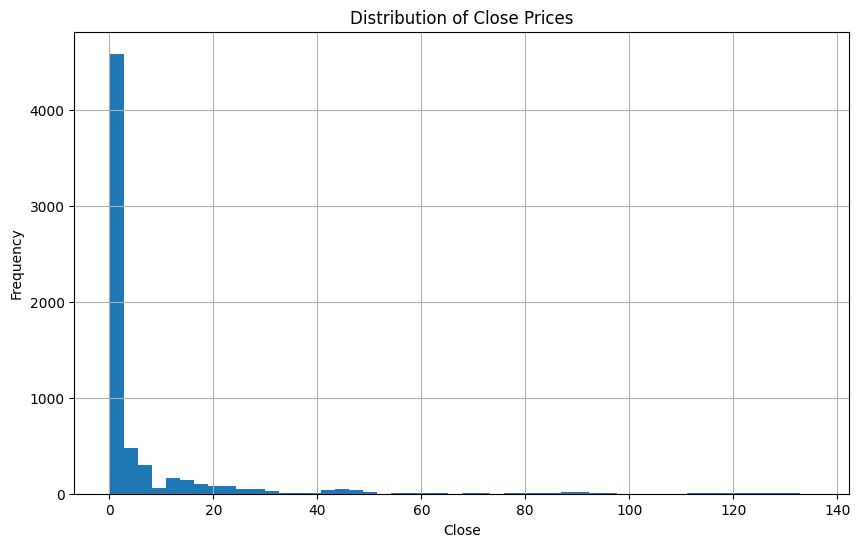

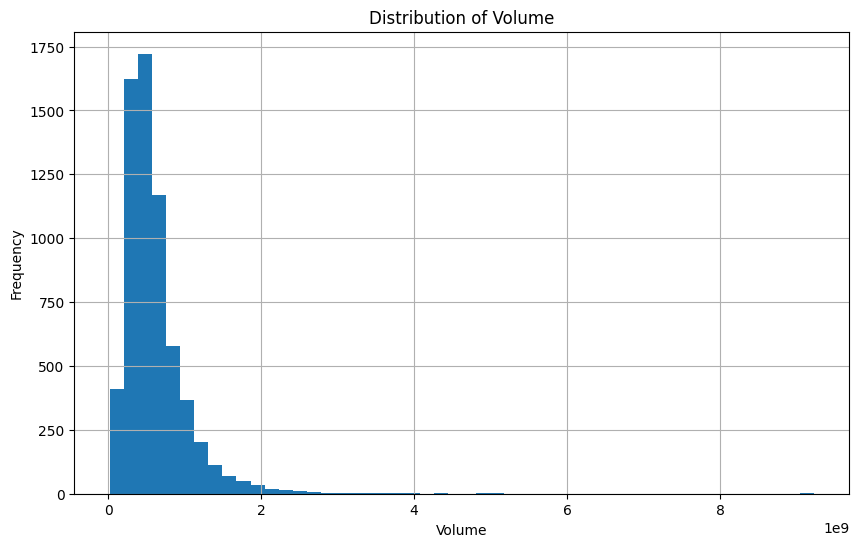

In [8]:
from scripts.edaAndQuantitativeAnalysis import plot_distributions
plot_distributions(data, 'Close', title="Distribution of Close Prices")
plot_distributions(data, 'Volume', title="Distribution of Volume")

>>> ##### Analyze correlation


Correlation Matrix:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999890  0.999800   0.999613  0.999613 -0.121492
High       0.999890  1.000000  0.999827   0.999801  0.999801 -0.120641
Low        0.999800  0.999827  1.000000   0.999871  0.999871 -0.122766
Adj Close  0.999613  0.999801  0.999871   1.000000  1.000000 -0.121855
Close      0.999613  0.999801  0.999871   1.000000  1.000000 -0.121819
Volume    -0.121492 -0.120641 -0.122766  -0.121855 -0.121819  1.000000


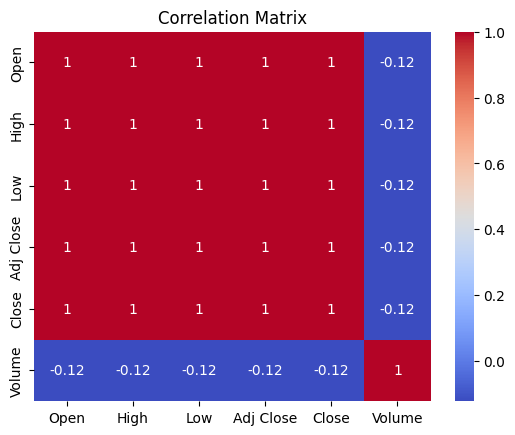

In [9]:
from scripts.edaAndQuantitativeAnalysis import analyze_correlations
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

>>> ##### study volatility

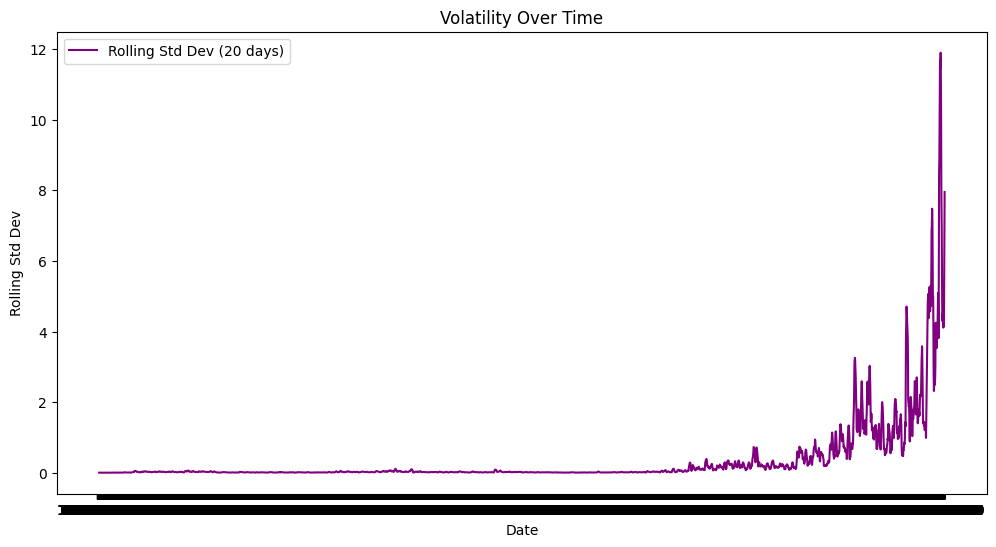

In [10]:
from scripts.edaAndQuantitativeAnalysis import plot_volatility
plot_volatility(data, 'Close', 'Date')